### Context

League of Legends adalah MOBA (Multiplayer Online Battle Arena) di mana dalam permainannya terdapat 2 tim (biru dan merah) yang saling berhadapan. Dalam satu laga permainan, ada 3 jalur yang dijadikan medan perang, hutan dan pemainnya terbagi jadi 5 peran. Tujuan permainan ini adalah menjatuhkan Nexus atau base musuh dan memenangkan permainan.

### Content

Diketahui dataset berisi 10 menit dari pertandingan.  Game yang dimainkan berperingkat 10k (SOLO QUEUE Player) dari ELO Diamond I hingga level Master. ELO sendiri merupakan teknik pencarian pemain dengan peringkat atau tingkat keterampilan yang sejenis. Setiap permainan yang terjadi itu unik. GameId dapat membantu kamu mengambil lebih banyak atribut dari Riot API pada kolom dataset. 

Dari data Glossary & Variables, diketahui terdapat 19 fitur pertim (total 38) yang dikumpulkan setelah 10 menit game berlangsung. Data ini termasuk pembunuhan, kematian, emas, pengalaman dan level. Di sini kamu dibebaskan untuk melakukan beberapa rekayasa fitur untuk mendapatkan lebih banyak wawasan atau insight. 

Pada data diketahui juga bahwa kolom blueWins adalah nilai target atau nilai yang akan coba diprediksi, di mana jika Nilai 1 berarti tim biru menang, sedangkan jika Nilai 0 maka sebaliknya. 

### Glossary

- Warding totem: Item yang dapat diletakkan pemain di peta untuk mengungkap area terdekat. Sangat berguna untuk kontrol peta/tujuan. 
- Minions: Item yang dapat diletakkan pemain di peta untuk mengungkap area terdekat. Sangat berguna untuk kontrol peta/tujuan.
- Jungle minions: NPC milik NO TEAM. Mereka memberi emas dan buff saat dibunuh oleh pemain.
- Elite monsters: Monster dengan hp/damage tinggi yang memberikan bonus besar (gold/XP/stat) saat dibunuh oleh tim.
- Dragons: Monster elit yang memberikan bonus tim saat terbunuh. Naga ke-4 yang dibunuh oleh tim memberikan bonus statistik yang sangat besar. The - - 5th dragon (Elder Dragon) menawarkan keuntungan besar bagi tim.
- Herald: Monster elit yang memberikan bonus statistik saat dibunuh oleh pemain. Ini membantu untuk mendorong jalur dan menghancurkan struktur.
- Towers: Struktur yang harus Anda hancurkan untuk mencapai Nexus musuh. Mereka memberi emas.
- Level: Champion level. Mulai dari 1. Maksimal 18.

### Variables

1. Gameid : ID RIOT unik dari game. Dapat digunakan dengan Riot Games API.
2. Bluewins: Kolom target. 1 jika tim biru menang, 0 sebaliknya.
3. blueWardsPlaced Jumlah totem penangkal yang ditempatkan oleh tim biru di peta
4. blueWardsDestroyed : Jumlah totem penangkal musuh yang telah dihancurkan oleh tim biru
5. blueFirstBlood : Pembunuhan pertama dari permainan. 1 jika tim biru melakukan pembunuhan pertama, 0 sebaliknya
6. blueKills : Jumlah musuh yang dibunuh oleh tim biru
7. blueDeaths : Jumlah kematian (tim biru)
8. blueAssists : Jumlah assist kill (tim biru)
9. blueEliteMonsters : Jumlah monster elit yang dibunuh oleh tim biru (Dragons and Heralds)
10. blueDragons : Jumlah naga yang dibunuh oleh tim biru
11. blueHeralds :  Jumlah tentara yang dibunuh oleh tim biru
12. blueTowersDestroyed : Jumlah bangunan yang dihancurkan oleh tim biru (menara...)
13. blueTotalGold : Tim biru total emas
14. blueAvgLevel : Tingkat juara rata-rata tim biru
15. blueTotalExperience : Pengalaman total tim biru
16. blueTotalMinionsKilled : Total minion tim biru terbunuh (CS)
17. blueTotalJungleMinionsKilled : Total monster hutan tim biru terbunuh
18. blueGoldDiff : Perbedaan emas tim biru dibandingkan dengan tim musuh
19. blueExperienceDiff : Tim biru mengalami perbedaan dibandingkan dengan tim musuh
20. blueCSPerMin : CS tim biru (antek) per menit
21. blueGoldPerMin : Emas tim biru per menit
22. redWardsPlaced : Jumlah totem penangkal yang ditempatkan oleh tim merah di peta
23. redWardsDestroyed : Jumlah totem penangkal musuh yang telah dihancurkan oleh tim merah
24. redFirstBlood : Pembunuhan pertama dari permainan. 1 jika tim merah melakukan pembunuhan pertama, 0 sebaliknya
25. redKills : Jumlah musuh yang dibunuh oleh tim merah
26. redDeaths : Jumlah kematian (tim merah)
27. redAssists: Jumlah assist kill (tim merah)
28. redEliteMonsters : Jumlah monster elit yang dibunuh oleh tim merah (Dragons and Heralds)
29. redDragons : Jumlah naga yang dibunuh oleh tim merah
30. redHeralds: Jumlah bentara yang dibunuh oleh tim merah
31. redTowersDestroyed : Jumlah bangunan yang dihancurkan oleh tim merah (menara)
32. redTotalGold: Tim merah total emas
33. redAvgLevel: Tingkat juara rata-rata tim merah
34. redTotalExperience: Pengalaman total tim merah
35. redTotalMinionsKilled : Total minion tim merah tewas (CS)
36. redTotalJungleMinionsKilled : Total monster hutan tim merah terbunuh
37. redGoldDiff : Perbedaan emas tim merah dibandingkan dengan tim musuh
38. redExperienceDiff : Tim merah mengalami perbedaan dibandingkan dengan tim musuh
39. redCSPerMin : CS tim merah (antek) per menit
40. redGoldPerMin : Emas tim merah per menit

## 1. Importing libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Import Data

df = pd.read_csv('high_diamond_ranked_10min.csv')

# Menampilkan 5 baris teratas dari dataset
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [3]:
# Checking the shape of the data

df.shape

(9879, 40)

## 2. Basic EDA & Data Preprocessing

In [4]:
# Checking null values

total_null = df.isnull().sum().sum()

print("Total nilai null dalam seluruh data: ", total_null)

Total nilai null dalam seluruh data:  0


In [5]:
# checking data types of the columns

print(df.dtypes)

gameId                            int64
blueWins                          int64
blueWardsPlaced                   int64
blueWardsDestroyed                int64
blueFirstBlood                    int64
blueKills                         int64
blueDeaths                        int64
blueAssists                       int64
blueEliteMonsters                 int64
blueDragons                       int64
blueHeralds                       int64
blueTowersDestroyed               int64
blueTotalGold                     int64
blueAvgLevel                    float64
blueTotalExperience               int64
blueTotalMinionsKilled            int64
blueTotalJungleMinionsKilled      int64
blueGoldDiff                      int64
blueExperienceDiff                int64
blueCSPerMin                    float64
blueGoldPerMin                  float64
redWardsPlaced                    int64
redWardsDestroyed                 int64
redFirstBlood                     int64
redKills                          int64


In [8]:
#checking for quasi constants

from sklearn.feature_selection import VarianceThreshold

# Membuat instance VarianceThreshold dengan threshold 0.01
selector = VarianceThreshold(threshold=0.01)

# Melakukan fit transform pada data
X = selector.fit_transform(df)

# Mengubah hasil transformasi menjadi DataFrame
df_new = pd.DataFrame(X, columns=df.columns[selector.get_support()])

# Menampilkan hasil transformasi
df_new.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4.519158e+09,0.0,28.0,2.0,1.0,9.0,6.0,11.0,0.0,0.0,...,0.0,16567.0,6.8,17047.0,197.0,55.0,-643.0,8.0,19.7,1656.7
1,4.523372e+09,0.0,12.0,1.0,0.0,5.0,5.0,5.0,0.0,0.0,...,1.0,17620.0,6.8,17438.0,240.0,52.0,2908.0,1173.0,24.0,1762.0
2,4.521475e+09,0.0,15.0,0.0,0.0,7.0,11.0,4.0,1.0,1.0,...,0.0,17285.0,6.8,17254.0,203.0,28.0,1172.0,1033.0,20.3,1728.5
3,4.524384e+09,0.0,43.0,1.0,0.0,4.0,5.0,5.0,1.0,0.0,...,0.0,16478.0,7.0,17961.0,235.0,47.0,1321.0,7.0,23.5,1647.8
4,4.436034e+09,0.0,75.0,4.0,0.0,6.0,6.0,6.0,0.0,0.0,...,0.0,17404.0,7.0,18313.0,225.0,67.0,1004.0,-230.0,22.5,1740.4


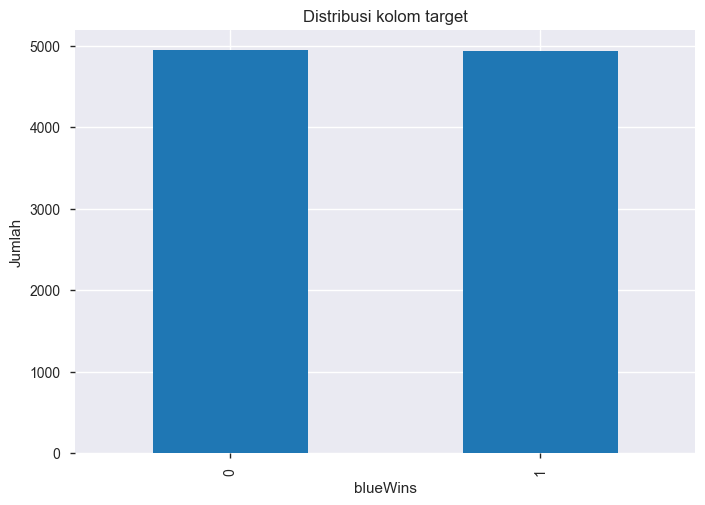

In [24]:
# Bar plot of the outcomes to see how they are distributed

import matplotlib.pyplot as plt

# Membuat bar plot dari kolom target (kolom "blueWins")
df["blueWins"].value_counts().plot(kind="bar")
plt.title("Distribusi kolom target")
plt.xlabel("blueWins")
plt.ylabel("Jumlah")
plt.show()

In [25]:
# Value counts data blueWins

counts = df["blueWins"].value_counts()

print("Jumlah data untuk setiap kategori:")
print(counts)

Jumlah data untuk setiap kategori:
0    4949
1    4930
Name: blueWins, dtype: int64


# Buatlah catatan dari hasil data preprocessing

#### Importing required libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 3. Data Splitting into train and test set

In [27]:
from sklearn.model_selection import train_test_split

# Memisahkan fitur dan target
X = df.drop("blueWins", axis=1)
y = df["blueWins"]

# Membagi data menjadi train set dan test set dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran train set dan test set
print("Ukuran train set: ", X_train.shape)
print("Ukuran test set: ", X_test.shape)

Ukuran train set:  (7903, 39)
Ukuran test set:  (1976, 39)


## 4. Feature Selection and Compare Each Model

Method 1: Feature Selection using different methods and checking with different models

Feature Selection using Feature importance of Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Membuat instance Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)

# Melakukan fitting pada data train
rfc.fit(X_train, y_train)

# Mengambil feature importance dari model
importances = rfc.feature_importances_

# Membuat DataFrame baru
feat_imp_df = pd.DataFrame({"fitur": X_train.columns, "importance": importances})

# Mengurutkan DataFrame baru berdasarkan nilai importance
feat_imp_df = feat_imp_df.sort_values("importance", ascending=False).reset_index(drop=True)

# Menampilkan DataFrame baru
print(feat_imp_df)

# Memilih fitur-fitur yang memiliki importance di atas threshold 0.01
selected_feat = feat_imp_df.loc[feat_imp_df["importance"] > 0.01, "fitur"].values

# Menampilkan fitur-fitur yang terpilih
print("Fitur yang terpilih: ", selected_feat)

                           fitur  importance
0                    redGoldDiff    0.084730
1                   blueGoldDiff    0.083919
2             blueExperienceDiff    0.069234
3              redExperienceDiff    0.058215
4                  blueTotalGold    0.053272
5                 blueGoldPerMin    0.044044
6             redTotalExperience    0.041061
7                   redTotalGold    0.041013
8                  redGoldPerMin    0.039985
9            blueTotalExperience    0.037471
10                        gameId    0.034959
11         redTotalMinionsKilled    0.027364
12  blueTotalJungleMinionsKilled    0.027308
13                  blueCSPerMin    0.026744
14                   redCSPerMin    0.026719
15   redTotalJungleMinionsKilled    0.026650
16        blueTotalMinionsKilled    0.025844
17               blueWardsPlaced    0.025606
18                redWardsPlaced    0.023772
19                   blueAssists    0.019043
20                    redAssists    0.018791
21        

Feature Selection using Recursive feature extraction (RFE)

In [20]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Membuat instance Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)

# Membuat instance RFE dengan estimator Random Forest Classifier
rfe = RFE(estimator=rfc, n_features_to_select=10, step=1)

# Melakukan fitting pada data train dengan RFE
rfe.fit(X_train, y_train)

# Mengambil ranking fitur dari model RFE
ranks = rfe.ranking_

# Membuat DataFrame baru
rfe_df = pd.DataFrame({"fitur": X_train.columns, "ranking": ranks})

# Mengurutkan DataFrame baru berdasarkan ranking
rfe_df = rfe_df.sort_values("ranking", ascending=True).reset_index(drop=True)

# Menampilkan DataFrame baru
print(rfe_df)

# Memilih fitur-fitur yang memiliki ranking di atas threshold 10
selected_feat = rfe_df.loc[rfe_df["ranking"] <= 10, "fitur"].values

# Menampilkan fitur-fitur yang terpilih
print("Fitur yang terpilih: ", selected_feat)

                           fitur  ranking
0                         gameId        1
1              redExperienceDiff        1
2                    redGoldDiff        1
3             redTotalExperience        1
4                   redTotalGold        1
5             blueExperienceDiff        1
6                   blueGoldDiff        1
7            blueTotalExperience        1
8                  blueTotalGold        1
9                 blueGoldPerMin        1
10                   redCSPerMin        2
11                 redGoldPerMin        3
12                  blueCSPerMin        4
13  blueTotalJungleMinionsKilled        5
14   redTotalJungleMinionsKilled        6
15        blueTotalMinionsKilled        7
16               blueWardsPlaced        8
17         redTotalMinionsKilled        9
18                redWardsPlaced       10
19                   blueAssists       11
20                    redAssists       12
21             redWardsDestroyed       13
22            blueWardsDestroyed  

## 5. Modelling and Evaluation


In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Mengambil subset DataFrame hanya dengan fitur-fitur yang terpilih
X = df[selected_feat]
y = df["blueWins"]

# Melakukan pembagian data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melakukan scaling pada data train dan test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membuat instance KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Melakukan fitting pada data train dengan KNN
knn.fit(X_train_scaled, y_train)

# Melakukan prediksi pada data test
y_pred = knn.predict(X_test_scaled)

# Menghitung nilai akurasi, precision, recall, dan F1-score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67       983
           1       0.67      0.67      0.67       993

    accuracy                           0.67      1976
   macro avg       0.67      0.67      0.67      1976
weighted avg       0.67      0.67      0.67      1976



Dalam contoh di atas, kita menggunakan KNN dengan jumlah tetangga terdekat (k) sebesar 5. Outputnya akan menampilkan nilai akurasi, precision, recall, dan F1-score dari model KNN yang kita buat.

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Mengambil subset DataFrame hanya dengan fitur-fitur yang terpilih
X = df[selected_feat]
y = df["blueWins"]

# Melakukan pembagian data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melakukan scaling pada data train dan test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membuat instance KNN
knn = KNeighborsClassifier()

# Mencari nilai k terbaik dengan GridSearchCV
params = {'n_neighbors': [3, 5, 7, 9, 11]}
grid = GridSearchCV(knn, params, cv=5)
grid.fit(X_train_scaled, y_train)

# Melakukan prediksi pada data test dengan model KNN terbaik
best_knn = grid.best_estimator_
y_pred = best_knn.predict(X_test_scaled)

# Menampilkan metrics evaluation score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.71      0.70       983
           1       0.70      0.68      0.69       993

    accuracy                           0.69      1976
   macro avg       0.69      0.69      0.69      1976
weighted avg       0.69      0.69      0.69      1976



Dalam contoh di atas, kita mencoba beberapa nilai k yang berbeda dari 3 hingga 11 dan mencari nilai k yang menghasilkan akurasi terbaik dengan GridSearchCV(). Kita menggunakan cross-validation dengan cv=5. Setelah mendapatkan nilai k terbaik, kita melakukan prediksi pada data test dengan model KNN terbaik dan menampilkan nilai akurasi, precision, recall, dan F1-score dari model tersebut.

Hasilnya akan tergantung pada dataset dan fitur-fitur yang digunakan. Namun, dalam umumnya, dengan melakukan hyperparameter tuning, kita dapat meningkatkan performa model KNN dan mendapatkan nilai akurasi yang lebih baik.